## CLASSIFICATION ANALYSIS 

In [2]:
## DATASET: CUSTOMER CHURN FROM Kaggle.com

In [3]:
# Necessary imports for preprocessing and machine learning

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# if you want to use one Hot encoder then you need to import the below onw
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer   # interpolation for missing values
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the dataset

df=pd.read_csv(r"/Users/nehatiwari/Documents/SCM516/516_Group/classification.csv")

In [5]:
df.head(5)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Contract_Type,Payment_Method,Has_Additional_Services,Churn
0,1,56.0,38,112.48,61.87,8,Two Year,Debit Card,1,0
1,2,69.0,28,174.51,310.65,6,Two Year,Debit Card,1,0
2,3,46.0,48,35.11,310.02,1,Month-to-Month,UPI,1,0
3,4,32.0,38,123.14,434.93,7,One Year,PayPal,0,0
4,5,60.0,31,95.38,286.54,1,Month-to-Month,Credit Card,0,1


In [6]:
df.dtypes

CustomerID                      int64
Age                           float64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                float64
Support_Calls                   int64
Contract_Type                  object
Payment_Method                 object
Has_Additional_Services         int64
Churn                           int64
dtype: object

####  Descriptive statistics of data

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,10000.0,5000.500000,2886.895680,1.00,2500.750,5000.50,7500.2500,10000.00
Age,9998.0,46.181136,16.551075,2.00,32.000,46.00,61.0000,250.00
Subscription_Length_Months,10000.0,29.901700,16.996680,1.00,15.000,29.00,45.0000,59.00
Monthly_Bill,10000.0,104.676996,54.670610,10.00,57.575,104.54,151.2475,199.98
Total_Usage_GB,10000.0,252.664805,145.052928,0.51,129.045,253.18,377.5475,2000.11
Support_Calls,10000.0,4.538300,2.876658,0.00,2.000,5.00,7.0000,9.00
Has_Additional_Services,10000.0,0.506500,0.499983,0.00,0.000,1.00,1.0000,1.00
Churn,10000.0,0.210700,0.407826,0.00,0.000,0.00,0.0000,1.00


In [9]:
df.describe(include=['object']).T

,count,unique,top,freq
Contract_Type,9998,3,Month-to-Month,3352
Payment_Method,10000,4,Debit Card,2540


#### Checking for Null Values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  10000 non-null  int64  
 1   Age                         9998 non-null   float64
 2   Subscription_Length_Months  10000 non-null  int64  
 3   Monthly_Bill                10000 non-null  float64
 4   Total_Usage_GB              10000 non-null  float64
 5   Support_Calls               10000 non-null  int64  
 6   Contract_Type               9998 non-null   object 
 7   Payment_Method              10000 non-null  object 
 8   Has_Additional_Services     10000 non-null  int64  
 9   Churn                       10000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 781.4+ KB


In [12]:
# find the total number of missing values for each variable

df.isnull().sum()

CustomerID                    0
Age                           2
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Support_Calls                 0
Contract_Type                 2
Payment_Method                0
Has_Additional_Services       0
Churn                         0
dtype: int64

#### Is the dataset balanced?

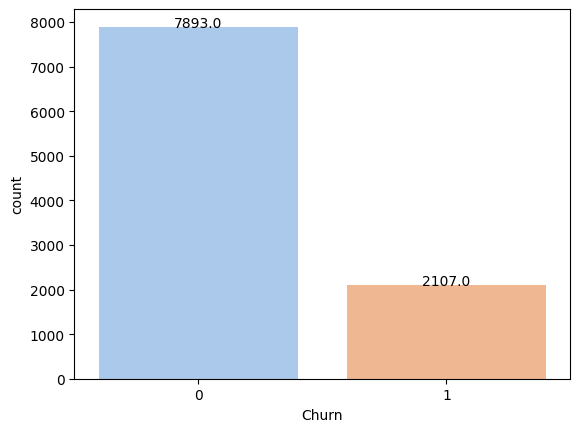

In [14]:
# Create the countplot
#ax = sns.countplot(data=df, x='Churn')
ax = sns.countplot(data=df, x='Churn', hue='Churn', palette='pastel', legend=False)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

# Display the plot
plt.show()

#### The dataset is not balanced. We balance it using SMOTE

In [16]:
# count the number of people who have customer churn yes against number of people who have customer churn no to see if the label/response
# is balanced or not
#customer churn yes = 1

# Number of people with customer churn yes
(df[['Churn']]==1).sum()      # you can also use      #df.Churn.value_counts()[1]

Churn    2107
dtype: int64

In [17]:
# Number of people with customer churn no
#Customer churn no = 0
(df[['Churn']]==0).sum()  # you can also use  #  df.Churn.value_counts()[0]

Churn    7893
dtype: int64

In [18]:
# calculate probability of customer churn yes

(df[['Churn']]==1).sum() / len(df['Churn'])

Churn    0.2107
dtype: float64

In [19]:
# calculate probability of customer churn no

(df[['Churn']]==0).sum() / len(df['Churn'])

Churn    0.7893
dtype: float64

#### Pie Chart to show data imbalance 

In [21]:
l = ['Churn', 'No Churn']
s = [ (df['Churn']==1).sum(), (df['Churn']==0).sum()]
c = ['#C5DCA0', '#A8C4C7']

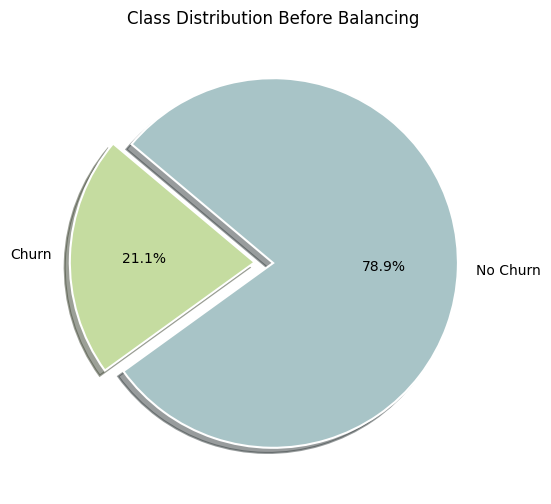

In [22]:
# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(s, labels=l, colors=c, explode=(0.1, 0), shadow=True, autopct='%1.1f%%', 
        startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

plt.title("Class Distribution Before Balancing")
plt.show()

####  Handling Missing values     

In [24]:
# How to get the list of all columns in my dataset

columns_list=df.columns.tolist()

In [25]:
columns_list

['CustomerID',
 'Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Support_Calls',
 'Contract_Type',
 'Payment_Method',
 'Has_Additional_Services',
 'Churn']

In [26]:
# We need to create a variable that stores the name of categorical columns
# as well a varibale that stores the name of numerical variable.
# because we need to handle missing values for categorical using mode technique
# we also need to replace the missing values of numerical variable using mean. Can also use linear interpocation

# List of categorical variables (dtype == object or category)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# List of numerical variables (dtype == int or float)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Display the lists
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['Contract_Type', 'Payment_Method']
Numerical columns: ['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Support_Calls', 'Has_Additional_Services', 'Churn']


In [27]:
# Input categorical variable with mode (replace missing values of a categorical variable with mode)

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    #for col in categorical_cols:
    #df[col].fillna(df[col].mode()[0], inplace=True)

# note that we may have multiple values for mode. mode()[0] returns the first most frequent category.
# mode()[1] returns the second mode. This is because the mode() function can potentially return multiple values if there
# is more than one mode (i.e., multiple values that occur with the same highest frequency).
# If you don’t use [0] and the mode() returns more than one value, the .fillna() function will not know which value to use
# If you remove it, you might get an error if there is more than one mode,
# because mode() can return multiple values and .fillna() requires only one value.

# If you remove inplace=True, the original DataFrame remains unchanged unless you explicitly reassign the result.

In [28]:
df.isnull().sum()  # all missing values under categorical variables have been replaced with their mode

CustomerID                    0
Age                           2
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Support_Calls                 0
Contract_Type                 0
Payment_Method                0
Has_Additional_Services       0
Churn                         0
dtype: int64

In [29]:
# handling missing values of numerical variables
# Input numerical column (variable), which is Age, with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
#df['age'].fillna(df['age'].mean(), inplace=True)


In [30]:
df.isnull().sum()   # zero missing values for numerical variable (age)

CustomerID                    0
Age                           0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Support_Calls                 0
Contract_Type                 0
Payment_Method                0
Has_Additional_Services       0
Churn                         0
dtype: int64

#### Find and remove outliers from numerical variable

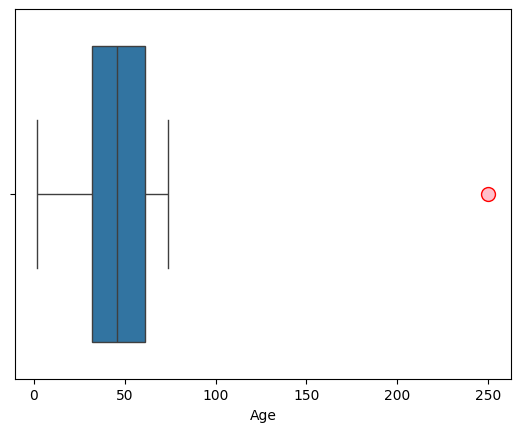

In [32]:
# Create a boxplot for the 'age' column to detect outliers
#sns.boxplot(data=df, x='Age');
# Customizing outlier appearance
sns.boxplot(data=df, x='Age',
            flierprops={"marker": "o", "markerfacecolor": "pink", "markeredgecolor": "red", "markersize": 10});

In [33]:
# Calculate the IQR for the 'age' column
Q1 = df['Age'].quantile(0.25)  # 25th percentile
Q3 = df['Age'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df1 = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# df1 is a new datafram after removing outliers

# Display the results (rows without outliers)
print("Cleaned DataFrame (Without Age Outliers):")
print(df1)

Cleaned DataFrame (Without Age Outliers):
      CustomerID   Age  Subscription_Length_Months  Monthly_Bill  \
0              1  56.0                          38        112.48   
1              2  69.0                          28        174.51   
2              3  46.0                          48         35.11   
3              4  32.0                          38        123.14   
4              5  60.0                          31         95.38   
...          ...   ...                         ...           ...   
9995        9996  40.0                           8        173.06   
9996        9997  58.0                          33        175.46   
9997        9998  57.0                          18         13.80   
9998        9999  46.0                          45         20.59   
9999       10000  33.0                          29        184.48   

      Total_Usage_GB  Support_Calls   Contract_Type Payment_Method  \
0              61.87              8        Two Year     Debit Card   
1

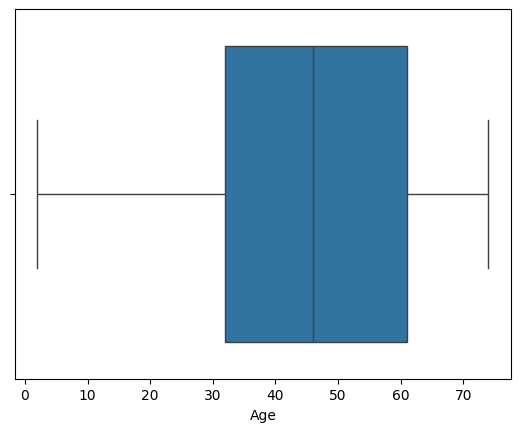

In [34]:
sns.boxplot(data=df1, x='Age');  # outliers have been removed

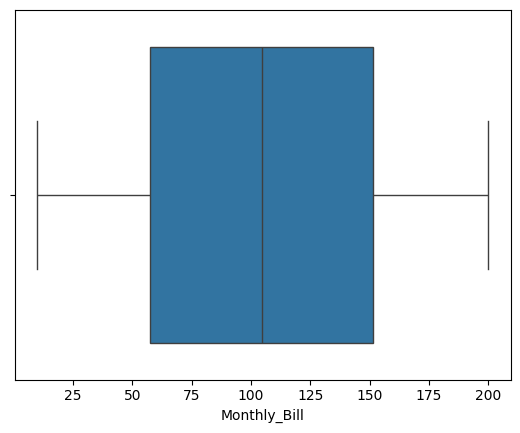

In [35]:
# Find and remove outlier from numerical variable

# Create a boxplot for the 'Monthly_Bill' column to detect outliers
sns.boxplot(data=df, x='Monthly_Bill');

In [36]:
# Calculate the IQR for the 'age' column
Q1 = df1['Monthly_Bill'].quantile(0.25)  # 25th percentile
Q3 = df1['Monthly_Bill'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df2 = df1[(df1['Monthly_Bill'] >= lower_bound) & (df1['Monthly_Bill'] <= upper_bound)]

# df1 is a new dataframe after removing Age outliers and df2 is the new dataframe after removing Age and MonthlyBill outliers

# Display the results (rows without outliers)
print("Cleaned DataFrame (Without Monthly_Bill Outliers):")
print(df2)

Cleaned DataFrame (Without Monthly_Bill Outliers):
      CustomerID   Age  Subscription_Length_Months  Monthly_Bill  \
0              1  56.0                          38        112.48   
1              2  69.0                          28        174.51   
2              3  46.0                          48         35.11   
3              4  32.0                          38        123.14   
4              5  60.0                          31         95.38   
...          ...   ...                         ...           ...   
9995        9996  40.0                           8        173.06   
9996        9997  58.0                          33        175.46   
9997        9998  57.0                          18         13.80   
9998        9999  46.0                          45         20.59   
9999       10000  33.0                          29        184.48   

      Total_Usage_GB  Support_Calls   Contract_Type Payment_Method  \
0              61.87              8        Two Year     Debit 

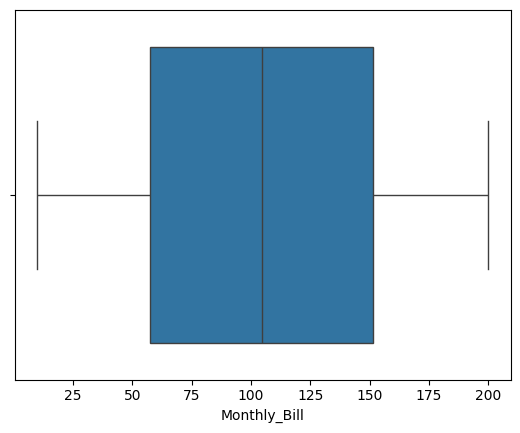

In [37]:
sns.boxplot(data=df2, x='Monthly_Bill');  # outliers have been removed

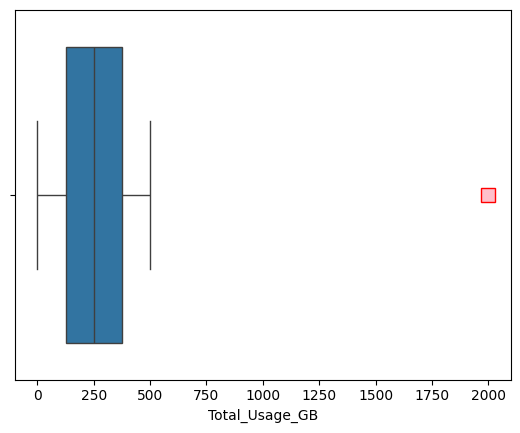

In [38]:
#sns.boxplot(data=df2, x='Total_Usage_GB');  # with outliers
# Customizing outlier appearance
sns.boxplot(data=df2, x='Total_Usage_GB',
            flierprops={"marker": "s", "markerfacecolor": "pink", "markeredgecolor": "red", "markersize": 10});

In [39]:
# Calculate the IQR for the 'age' column
Q1 = df2['Total_Usage_GB'].quantile(0.25)  # 25th percentile
Q3 = df2['Total_Usage_GB'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df3 = df2[(df2['Total_Usage_GB'] >= lower_bound) & (df2['Total_Usage_GB'] <= upper_bound)]

# df3 is a new dataframe after removing Total Usage outliers.

# Display the results (rows without outliers)
print("Cleaned DataFrame (Without Total_Usage_GB Outliers):")
print(df3)

Cleaned DataFrame (Without Total_Usage_GB Outliers):
      CustomerID   Age  Subscription_Length_Months  Monthly_Bill  \
0              1  56.0                          38        112.48   
1              2  69.0                          28        174.51   
2              3  46.0                          48         35.11   
3              4  32.0                          38        123.14   
4              5  60.0                          31         95.38   
...          ...   ...                         ...           ...   
9995        9996  40.0                           8        173.06   
9996        9997  58.0                          33        175.46   
9997        9998  57.0                          18         13.80   
9998        9999  46.0                          45         20.59   
9999       10000  33.0                          29        184.48   

      Total_Usage_GB  Support_Calls   Contract_Type Payment_Method  \
0              61.87              8        Two Year     Debi

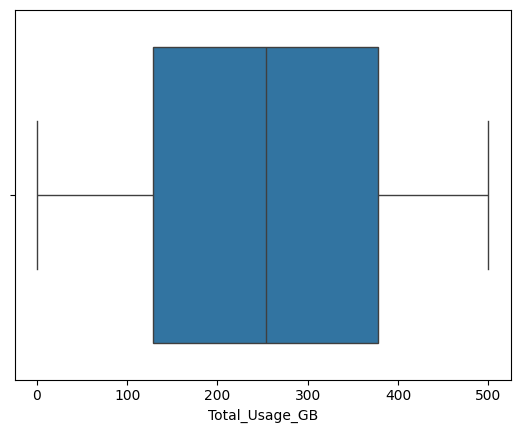

In [40]:
sns.boxplot(data=df3, x='Total_Usage_GB');  # outliers have been removed

In [41]:
type(df3)

pandas.core.frame.DataFrame

#### Label Encoding for Categorical Features

In [43]:
# in this datase, we have 2 categorical features (e.g., contract_type(monthly, year-to-year, ..), and a response/label variable)

# we use the following function to encode categorical variable

from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

for col in categorical_cols:    # we define categorical_cols   in line [73]
    df3.loc[:,col]=lb.fit_transform(df3[col])   # note that df3 is new dataframe without outliers

In [44]:
df3.head(5)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Contract_Type,Payment_Method,Has_Additional_Services,Churn
0,1,56.0,38,112.48,61.87,8,2,1,1,0
1,2,69.0,28,174.51,310.65,6,2,1,1,0
2,3,46.0,48,35.11,310.02,1,0,3,1,0
3,4,32.0,38,123.14,434.93,7,1,2,0,0
4,5,60.0,31,95.38,286.54,1,0,0,0,1


In [45]:
numerical_cols

['CustomerID',
 'Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Support_Calls',
 'Has_Additional_Services',
 'Churn']

In [46]:
df3.columns

Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Support_Calls', 'Contract_Type', 'Payment_Method',
       'Has_Additional_Services', 'Churn'],
      dtype='object')

In [47]:
# Standardize the numerical variable (Age variable)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df3 = df3.copy();
scale_cols = [x for x in numerical_cols if x != 'CustomerID']
df3.loc[:,scale_cols] = scaler.fit_transform(df3[scale_cols]);  # we define list of numerical variable in line [22]

# df3 is the new dataframe after standardizing the numerical variable

/var/folders/9p/02j0tmhs5w35zmgt4_pc9src0000gn/T/ipykernel_23033/3217076613.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63793103 0.46551724 0.81034483 ... 0.29310345 0.75862069 0.48275862]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[:,scale_cols] = scaler.fit_transform(df3[scale_cols]);  # we define list of numerical variable in line [22]
/var/folders/9p/02j0tmhs5w35zmgt4_pc9src0000gn/T/ipykernel_23033/3217076613.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.88888889 0.66666667 0.11111111 ... 0.33333333 0.77777778 0.44444444]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[:,scale_cols] = scaler.fit_transform(df3[scale_cols]);  # we define list of numerical variable in line [22]


In [48]:
df3

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Contract_Type,Payment_Method,Has_Additional_Services,Churn
0,1,0.750000,0.637931,0.539425,0.122848,0.888889,2,1,1,0
1,2,0.930556,0.465517,0.865933,0.620926,0.666667,2,1,1,0
2,3,0.611111,0.810345,0.132172,0.619664,0.111111,0,3,1,0
3,4,0.416667,0.637931,0.595536,0.869745,0.777778,1,2,0,0
4,5,0.805556,0.517241,0.449416,0.572656,0.111111,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,0.527778,0.120690,0.858301,0.254084,0.222222,2,0,1,0
9996,9997,0.777778,0.551724,0.870934,0.770842,0.111111,2,1,0,0
9997,9998,0.763889,0.293103,0.020002,0.229359,0.333333,0,3,1,0
9998,9999,0.611111,0.758621,0.055743,0.521242,0.777778,1,2,1,0


#### Define Features (X) and Response/Label (y)

In [50]:
X= df3.drop(columns=['Churn'])
y=df3['Churn']

In [51]:
# We saw earlier that the data is not balanced. We apply SMOTE sampling technique to our imbalanced data

smote = SMOTE()

X_res, y_res = smote.fit_resample(X,y)


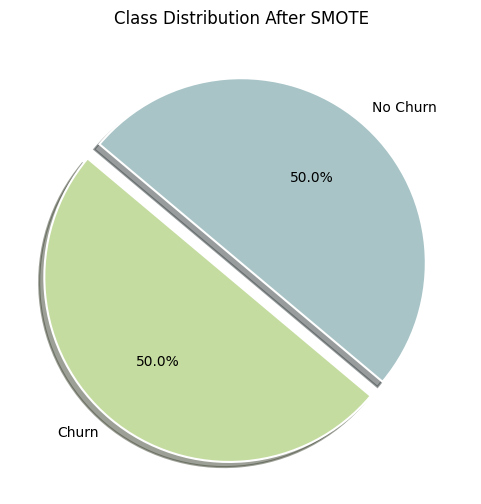

In [52]:
from collections import Counter

# Count occurrences in resampled data
class_counts = Counter(y_res)  # Get counts of Churn (1) and No Churn (0)

l = ['Churn', 'No Churn']

# Values for pie chart
s = [class_counts[1], class_counts[0]]  # Count of churned and non-churned customers

c = ['#C5DCA0', '#A8C4C7'] 

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(s, labels=l, colors=c, explode=(0.1, 0), shadow=True, autopct='%1.1f%%', 
        startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

plt.title("Class Distribution After SMOTE")
plt.show()


In [53]:
y_res

0        0
1        0
2        0
3        0
4        1
        ..
15779    1
15780    1
15781    1
15782    1
15783    1
Name: Churn, Length: 15784, dtype: int64

In [54]:
y_res.value_counts()  # the response/ label has been balanced

Churn
0    7892
1    7892
Name: count, dtype: int64

In [55]:
# split into training and testing test

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=8)

#### Generating Models 

In [57]:
# Naive Bayes Model

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

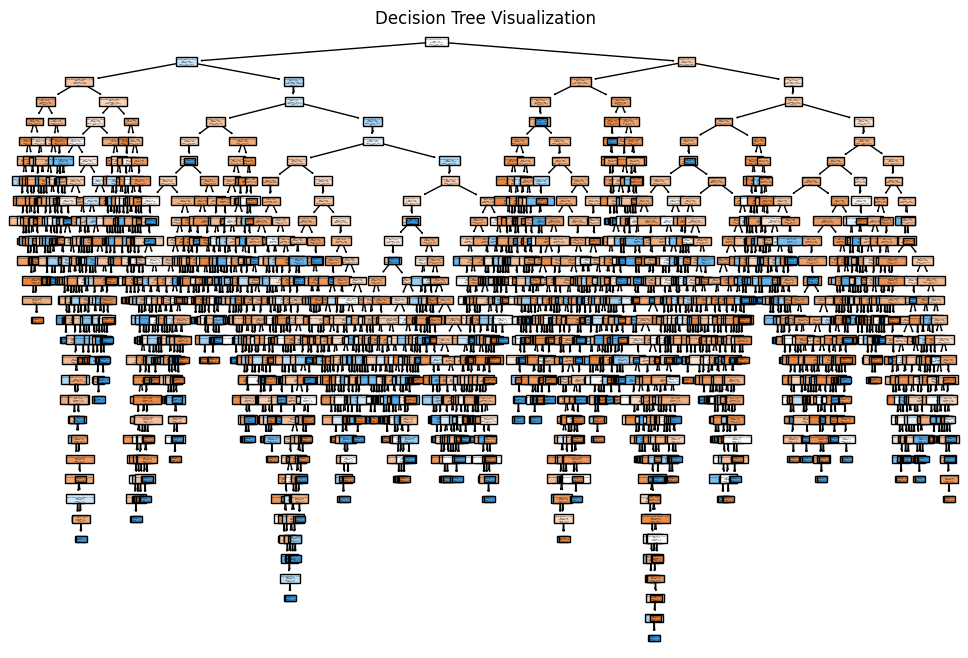

In [58]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=[str(i) for i in dt_model.classes_])
plt.title("Decision Tree Visualization")
plt.show()

In [59]:
# Random Forest Model

rf_model = RandomForestClassifier()
#rf_model = RandomForestClassifier(criterion='gini', n_estimators=200, max_depth=5, class_weight='balanced') #0.84, 0.82
#rf_model = RandomForestClassifier(criterion='entropy', n_estimators=500, max_depth=10, class_weight='balanced') #0.95, 0.86
#rf_model = RandomForestClassifier(criterion='gini', n_estimators=500, max_depth=10) #0.96 , #0.86
#rf_model = RandomForestClassifier(criterion='gini', n_estimators=10, max_depth=10) #0.93, 0.85
#rf_model = RandomForestClassifier(criterion='gini', n_estimators=100) #1, 0.88
#rf_model = RandomForestClassifier(criterion='gini', n_estimators=80, max_depth =15, min_samples_leaf=50) #0.89, 0.85
rf_model = RandomForestClassifier(criterion='gini', n_estimators=100, min_samples_leaf=5) #0.98, 0.87
#rf_model = RandomForestClassifier(criterion='gini', n_estimators=10) #1, 0.86
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

In [60]:
# KNN model

knn_model =KNeighborsClassifier(n_neighbors=3)
# For n_neighbors =5, accuracy is 0.72
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

#### Evaluation: Confusion Matrix and Other Metrics

In [62]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"PRecall:   {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}\n")

In [63]:
# Evaluate all models

evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "KNN")

Model: Naive Bayes
Confusion Matrix:
[[1345 1011]
 [ 804 1576]]
Accuracy:  0.62
Precision: 0.61
PRecall:   0.66
F1 Score:  0.63

Model: Decision Tree
Confusion Matrix:
[[1727  629]
 [ 554 1826]]
Accuracy:  0.75
Precision: 0.74
PRecall:   0.77
F1 Score:  0.76

Model: Random Forest
Confusion Matrix:
[[2305   51]
 [ 733 1647]]
Accuracy:  0.83
Precision: 0.97
PRecall:   0.69
F1 Score:  0.81

Model: KNN
Confusion Matrix:
[[1327 1029]
 [ 566 1814]]
Accuracy:  0.66
Precision: 0.64
PRecall:   0.76
F1 Score:  0.69



In [64]:
# plot confusion matrix using seaborn library

cm1=confusion_matrix(y_test, y_pred_nb)
cm2=confusion_matrix(y_test, y_pred_dt)
cm3=confusion_matrix(y_test, y_pred_rf)
cm4=confusion_matrix(y_test, y_pred_knn)

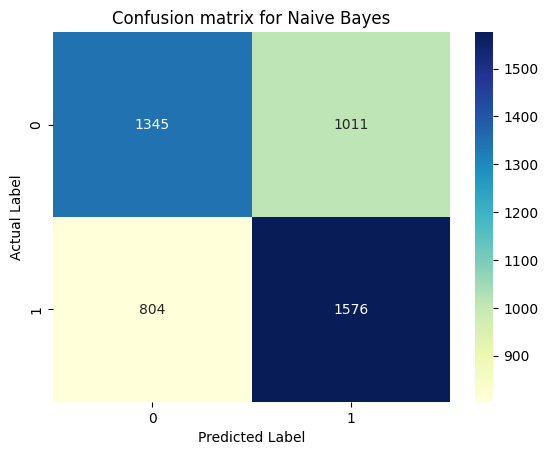

In [65]:
# confusion matrix for Naive Bayes

sns.heatmap(cm1, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for Naive Bayes');

#### Does overfitting happen for Naive Bayes? We need to compare the accuracy of testing against accuracy of training

In [67]:
print ("Accuracy of Naive Bayes for training database is:", nb_model.score(X_train, y_train))

Accuracy of Naive Bayes for training database is: 0.6355901520637219


In [68]:
print ("Accuracy of Naive Bayes for testing datatse is:", nb_model.score(X_test, y_test))

Accuracy of Naive Bayes for testing datatse is: 0.6167652027027027


Naive Bayes thus doesn't overfit. Underfits actually and thus has poor accuracy for both train and test datasets.

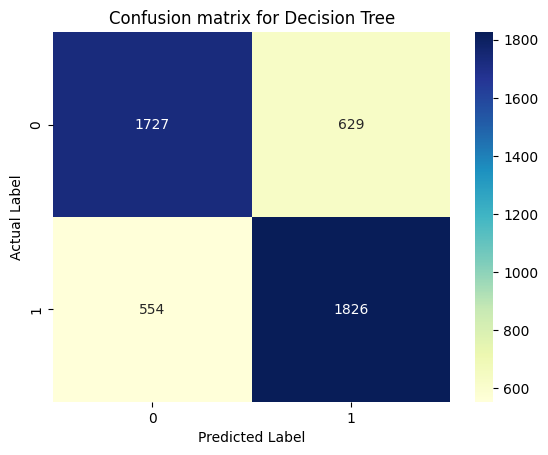

In [70]:
# confusion matrix for Decision Tree

sns.heatmap(cm2, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for Decision Tree');

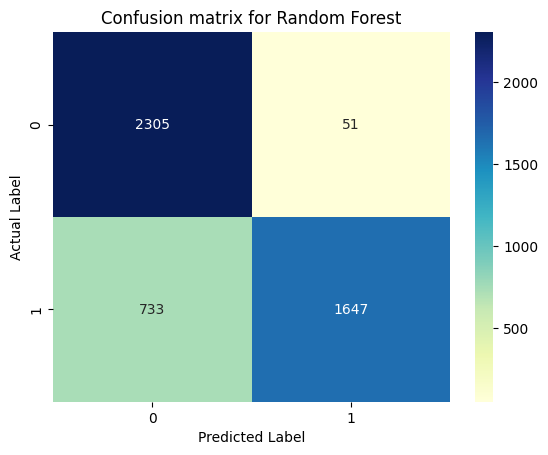

In [71]:
# confusion matrix for Random Forest

sns.heatmap(cm3, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for Random Forest');

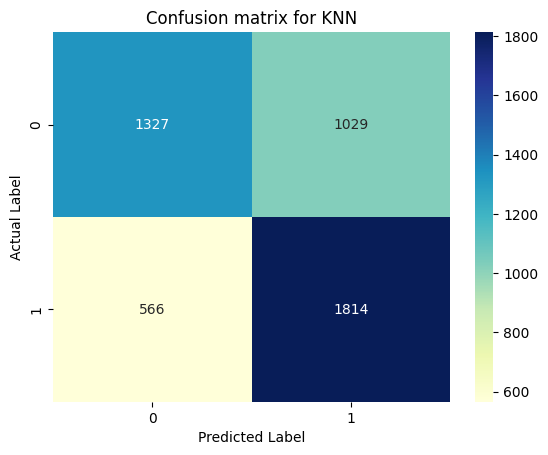

In [72]:
# confusion matrix for KNN

sns.heatmap(cm4, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix for KNN');

In [73]:
# Random forest has the best performance. let's put all its measures in a report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85      2356
           1       0.97      0.69      0.81      2380

    accuracy                           0.83      4736
   macro avg       0.86      0.84      0.83      4736
weighted avg       0.86      0.83      0.83      4736



#### plot ROC curve for Xtrain and Xtest

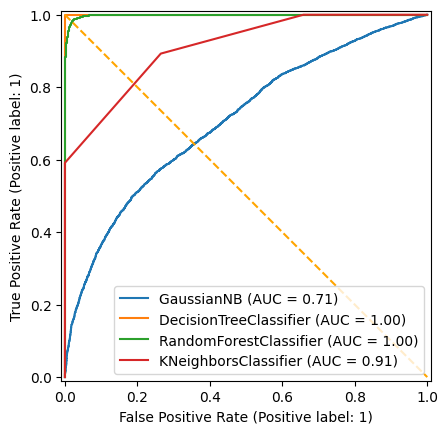

In [75]:
# ROC Curve for Training dataset

from sklearn.metrics import RocCurveDisplay

disp =RocCurveDisplay.from_estimator(nb_model, X_train, y_train)
RocCurveDisplay.from_estimator(dt_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_model, X_train, y_train, ax=disp.ax_)
plt.plot([0,1], [1,0], color='orange', linestyle='--');

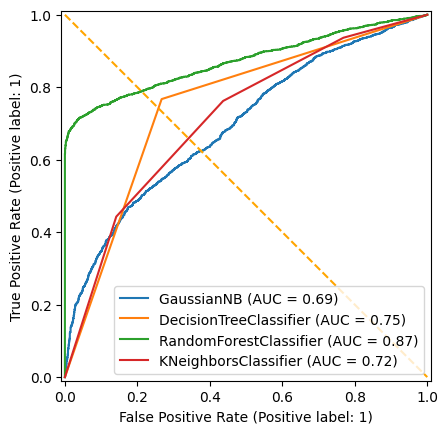

In [76]:
# ROC Curve for Testing dataset

disp =RocCurveDisplay.from_estimator(nb_model, X_test, y_test)
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_model, X_test, y_test, ax=disp.ax_)
plt.plot([0,1], [1,0], color='orange', linestyle='--');

#### Evaluate model for new dataset

In [78]:
# Given 3 new customers
customer_df = pd.DataFrame({
    'CustomerID': [10001, 10002, 10003],
    'Age': [43.296, 55.704, 35.928],
    'Subscription_Length_Months': [33.66, 48.45, 27.08],
    'Monthly_Bill': [107.8, 144.6, 71.65],
    'Total_Usage_GB': [230.95, 398.05, 131.65],
    'Support_Calls': [1, 9, 1],
    'Contract_Type': ['Month-to-Month', 'One Year', 'Month-to-Month'],
    'Payment_Method': ['Debit Card', 'Credit Card', 'PayPal'],
    'Has_Additional_Services': [1, 1, 0]
})


In [79]:
customer_df

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Contract_Type,Payment_Method,Has_Additional_Services
0,10001,43.296,33.66,107.80,230.95,1,Month-to-Month,Debit Card,1
1,10002,55.704,48.45,144.60,398.05,9,One Year,Credit Card,1
2,10003,35.928,27.08,71.65,131.65,1,Month-to-Month,PayPal,0


In [80]:
# Make a new prediction for new customers (customer_df)

# load new observations (new customers data normalized and encoded)
new_data = pd.DataFrame({
    'CustomerID': [10001, 10002, 10003],
    'Age': [-0.142, 0.892, -0.756],
    'Subscription_Length_Months': [-0.234, 1.245, -0.892],
    'Monthly_Bill': [0.156, 0.892, -0.567],
    'Total_Usage_GB': [-0.127, 0.987, -0.789],
    'Support_Calls': [0, 1, 0],
    'Contract_Type': [0, 1, 0],
    'Payment_Method': [1, 0, 2],
    'Has_Additional_Services': [1, 1, 0]
})

In [81]:
new_data.head(5)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Contract_Type,Payment_Method,Has_Additional_Services
0,10001,-0.142,-0.234,0.156,-0.127,0,0,1,1
1,10002,0.892,1.245,0.892,0.987,1,1,0,1
2,10003,-0.756,-0.892,-0.567,-0.789,0,0,2,0


In [82]:
# Create new data with exact same structure as X_train
new_data_standardized = pd.DataFrame({
    'CustomerID': [10001, 10002, 10003],
    'Age': [-0.142, 0.892, -0.756],
    'Subscription_Length_Months': [-0.234, 1.245, -0.892],
    'Monthly_Bill': [0.156, 0.892, -0.567],
    'Total_Usage_GB': [-0.127, 0.987, -0.789],
    'Support_Calls': [0, 1, 0],
    'Contract_Type': [0, 1, 0],
    'Payment_Method': [1, 0, 2],
    'Has_Additional_Services': [1, 1, 0]
})

# Make predictions
y_pred_new = rf_model.predict(new_data_standardized)
print("Predictions for new customers:", y_pred_new)

# Get prediction probabilities (optional)
y_pred_prob = rf_model.predict_proba(new_data_standardized)
print("\nPrediction probabilities:")
for i, prob in enumerate(y_pred_prob):
    print(f"Customer {i+1} - No Churn: {prob[0]:.2f}, Churn: {prob[1]:.2f}")

Predictions for new customers: [0 0 0]

Prediction probabilities:
Customer 1 - No Churn: 0.78, Churn: 0.22
Customer 2 - No Churn: 0.76, Churn: 0.24
Customer 3 - No Churn: 0.77, Churn: 0.23


In [83]:
y_pred_new_observation=rf_model.predict(new_data)

In [84]:
y_pred_new_observation

array([0, 0, 0])

####  Find the importance of features

In [86]:
# ----- Features importance using Random Forest

rf=RandomForestClassifier(random_state=1, n_estimators=100)

In [87]:
rf.fit(X,y)

RandomForestClassifier(random_state=1)

In [88]:
I = rf.feature_importances_

In [89]:
I

array([0.18267379, 0.13463516, 0.13316602, 0.18010421, 0.18317085,
       0.07943338, 0.03809709, 0.04785989, 0.02085962])

In [90]:
df3.columns

Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Support_Calls', 'Contract_Type', 'Payment_Method',
       'Has_Additional_Services', 'Churn'],
      dtype='object')

In [91]:
# we need the name of features columns. df3.columns include Churn name. we need to drop Churn

# Define a variable that contains only the feature column names
# First drop CustomerID since it adds no value to target prediction
#df_no_id = df3.drop(['CustomerID'], axis=1)

# Then drop Churn from df_no_id
name_features = df3.drop(df3['Churn']).columns.tolist()
name_features

['CustomerID',
 'Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Support_Calls',
 'Contract_Type',
 'Payment_Method',
 'Has_Additional_Services',
 'Churn']

In [92]:
len(name_features)

10

In [93]:
len(I)

9

In [94]:
# generate a new dataframe call it df_I

df_I=pd.DataFrame([I, name_features])

In [95]:
df_I

,0,1,2,3,4,5,6,7,8,9
0,0.182674,0.134635,0.133166,0.180104,0.183171,0.079433,0.038097,0.04786,0.02086,None
1,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Contract_Type,Payment_Method,Has_Additional_Services,Churn


/var/folders/9p/02j0tmhs5w35zmgt4_pc9src0000gn/T/ipykernel_23033/2523790702.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


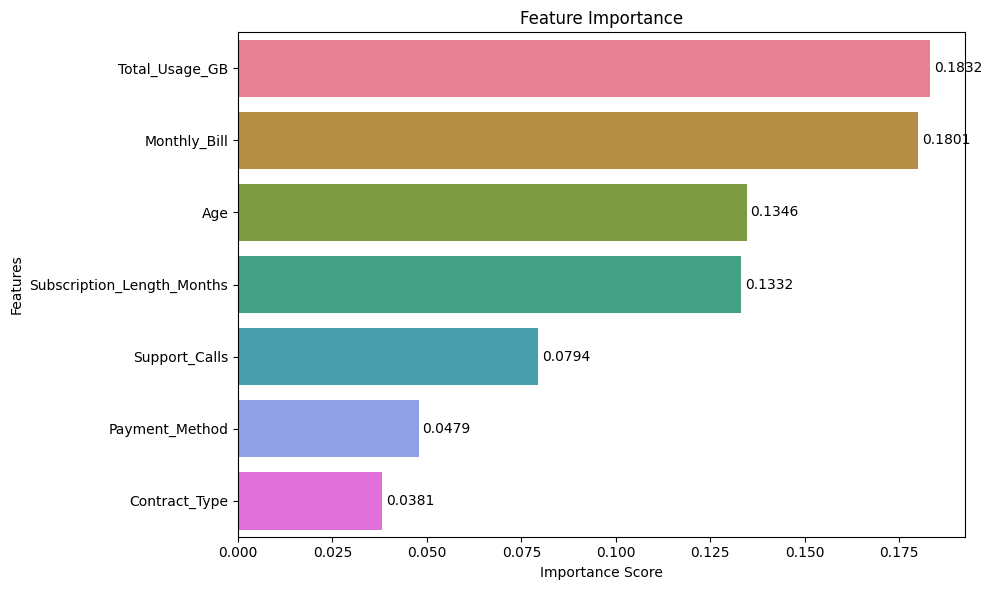

In [96]:
# Remove 'Churn' and 'CustomerID' from name_features
name_features = name_features[:-1]  # Remove the last element (Churn)
name_features_filtered = [feature for feature in name_features[:-1] if feature != 'CustomerID'] # Remove CustomerID as it isn't a target determining attribute

# Remove the first element in I (corresponding to CustomerID)
I_filtered = I[1:-1]

# Create the DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': name_features_filtered,
    'Importance': I_filtered
})

# Sort by importance value
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create the barplot with different colors
plt.figure(figsize=(10, 6))

# Option 1: Using a colorful seaborn palette
colors = sns.color_palette("husl", len(feature_importance_df))  # Create a colorful palette

# Create the plot with different colors for each bar
ax = sns.barplot(
    data=feature_importance_df,
    x='Importance',
    y='Feature',
    palette=colors
)

# Add value labels to the bars for better readability
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v + 0.001, i, f"{v:.4f}", va='center')

plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#### Find the best value of K in KNN

In [98]:
from sklearn.metrics import balanced_accuracy_score

In [99]:
error=[]

#calculating the error for k values between 1 and 39

for i in range(1,21):  # i=1,2,...,20
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy = balanced_accuracy_score(y_test, pred_i)
    error.append(1-accuracy)

error;

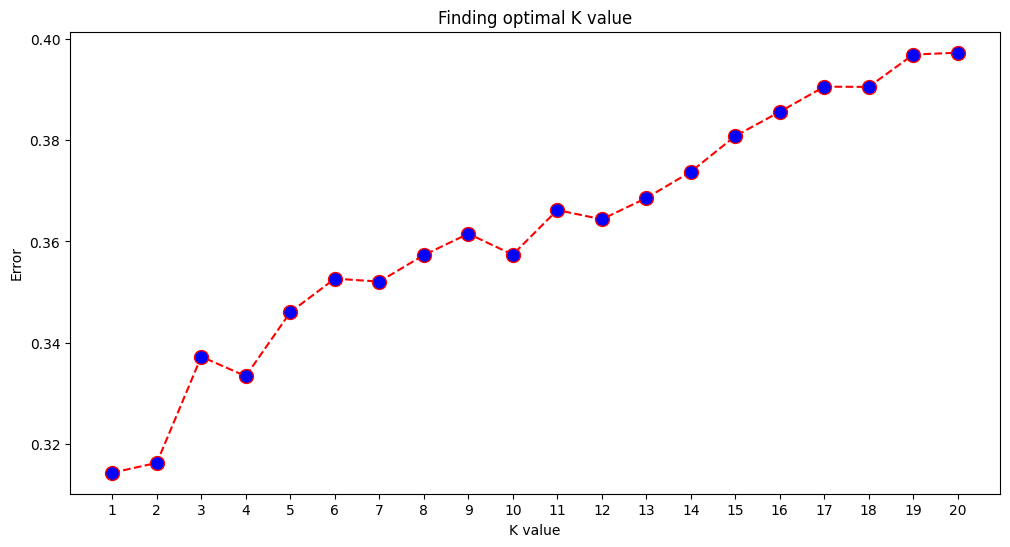

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(range(1,21), error, color='red',   linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

plt.title ('Finding optimal K value')
plt.xlabel ('K value')
plt.ylabel('Error');

# Set the ticks on the X-axis to integer values
plt.xticks(ticks=range(1, 21));  # Set the ticks to integers 1 to 20

#### Remodeling using KNN using the optimal K value

In [102]:
# KNN model with n=1

knn_model =KNeighborsClassifier(n_neighbors=1)
# For n_neighbors =3, accuracy is 0.74
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
evaluate_model(y_test, y_pred_knn, "KNN")

Model: KNN
Confusion Matrix:
[[1319 1037]
 [ 449 1931]]
Accuracy:  0.69
Precision: 0.65
PRecall:   0.81
F1 Score:  0.72



In [249]:
# KNN model with n=2

knn_model =KNeighborsClassifier(n_neighbors=1)
# For n_neighbors =3, accuracy is 0.74
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
evaluate_model(y_test, y_pred_knn, "KNN") 
 

Model: KNN
Confusion Matrix:
[[1319 1037]
 [ 449 1931]]
Accuracy:  0.69
Precision: 0.65
PRecall:   0.81
F1 Score:  0.72



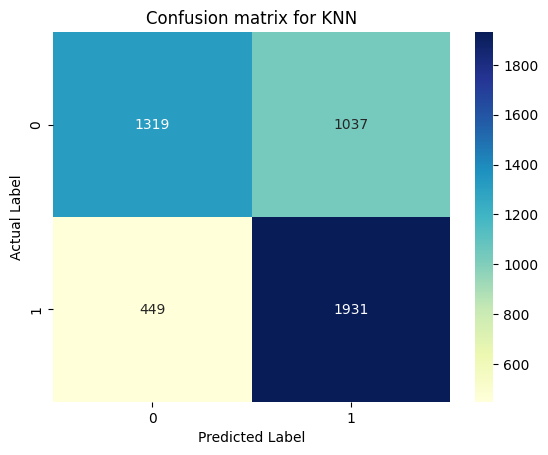

In [251]:
# confusion matrix for KNN
cm5=confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm5, annot=True, cmap='YlGnBu', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.title('Confusion matrix for KNN');

In [247]:
# KNN model with n=4

knn_model =KNeighborsClassifier(n_neighbors=3)
# For n_neighbors =3, accuracy is 0.74
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
evaluate_model(y_test, y_pred_knn, "KNN")

Model: KNN
Confusion Matrix:
[[1327 1029]
 [ 566 1814]]
Accuracy:  0.66
Precision: 0.64
PRecall:   0.76
F1 Score:  0.69



As **n** increases in KNN, the model's performance varies. At **n=1**, the model achieves the highest recall (0.95) but at the cost of lower precision (0.74), indicating a tendency to favor positive predictions. While accuracy remains relatively stable (~0.74–0.81) across different values of **n**, a trade-off between precision and recall becomes evident. **n=2** offers the best balance (Precision: 0.78, Recall: 0.83, F1: 0.80). However, performance declines for **n=3** and **n=4**, suggesting that increasing the number of neighbors beyond **n=2** diminishes the model’s effectiveness.

##  Conditional Probability 

In [108]:
# 1. What is the probability of churn for customers with a Two Year contract and subscription length over 36 months?
# P(Churn = 1 | Contract_Type = "Two Year", Subscription_Length_Months > 36)
((df['Contract_Type'] == "Two Year") & (df['Subscription_Length_Months'] > 36) & (df['Churn'] == 1)).sum() / ((df['Contract_Type'] == "Two Year") & (df['Subscription_Length_Months'] > 36)).sum()

0.2153846153846154

In [109]:
# 2. What is the probability of churn for customers with usage over 300GB and monthly bill over $150?
# P(Churn = 1 | Total_Usage_GB > 300, Monthly_Bill > 150)
((df['Total_Usage_GB'] > 300) & (df['Monthly_Bill'] > 150) & (df['Churn'] == 1)).sum() / ((df['Total_Usage_GB'] > 300) & (df['Monthly_Bill'] > 150)).sum()


0.20408163265306123

In [110]:
# 3. What is the probability of churn for customers with more than 5 support calls?
# P(Churn = 1 | Support_Calls > 5)
((df['Support_Calls'] > 5) & (df['Churn'] == 1)).sum() / (df['Support_Calls'] > 5).sum()

0.20586062546170894

In [111]:
# 4. What is the probability of churn for customers aged 60+ with low usage (<100GB)?
# P(Churn = 1 | Age >= 60, Total_Usage_GB < 100)
((df['Age'] >= 60) & (df['Total_Usage_GB'] < 100) & (df['Churn'] == 1)).sum() / ((df['Age'] >= 60) & (df['Total_Usage_GB'] < 100)).sum()


0.18495934959349594

In [112]:
# 5. What is the probability of churn for customers with monthly bill over $90?
# P(Churn = 1 | Monthly_Bill > 90)
((df['Monthly_Bill'] > 90) & (df['Churn'] == 1)).sum() / (df['Monthly_Bill'] > 90).sum()


0.20373277516134658

In [113]:
# 6. What is the probability that a heavy usage customer (>300GB) has a Month-to-Month contract?
# P(Contract_Type = "Month-to-Month" | Total_Usage_GB > 300)
((df['Total_Usage_GB'] > 300) & (df['Contract_Type'] == "Month-to-Month")).sum() / (df['Total_Usage_GB'] > 300).sum()


0.33398821218074654

In [114]:
# 7. What is the probability of churn for customers with more than 5 support calls, a Month-to-Month contract, and monthly bill over $100?
# P(Churn = 1 | Support_Calls > 5, Contract_Type = "Month-to-Month", Monthly_Bill > 100)
((df['Support_Calls'] > 5) & (df['Contract_Type'] == "Month-to-Month") & (df['Monthly_Bill'] > 100) & (df['Churn'] == 1)).sum() / ((df['Support_Calls'] > 5) & (df['Contract_Type'] == "Month-to-Month") & (df['Monthly_Bill'] > 100)).sum()

0.20084865629420084

## Feature Importance

In [116]:
# Determining the significance of Monthly Bill when predicting customer churn
# (Churn = 1) as the target variable.

# Conditional probabilities for high vs low monthly bill
median_bill = df['Monthly_Bill'].median()
prob_high_bill = ((df['Monthly_Bill'] > median_bill) & (df['Churn'] == 1)).sum() / (df['Monthly_Bill'] > median_bill).sum()
prob_low_bill = ((df['Monthly_Bill'] <= median_bill) & (df['Churn'] == 1)).sum() / (df['Monthly_Bill'] <= median_bill).sum()

print("Conditional probabilities:", "\nHigh_Bill:", prob_high_bill, "\nLow_Bill:", prob_low_bill)

# Calculating difference to determine significance
bill_difference = abs(prob_high_bill - prob_low_bill)
print("Feature importance of Monthly Bill is:")
print("Difference:", bill_difference)

Conditional probabilities: 
High_Bill: 0.2002 
Low_Bill: 0.2212
Feature importance of Monthly Bill is:
Difference: 0.02100000000000002


In [117]:
# Determining the significance of Total Usage when predicting customer churn
median_usage = df['Total_Usage_GB'].median()
prob_high_usage = ((df['Total_Usage_GB'] > median_usage) & (df['Churn'] == 1)).sum() / (df['Total_Usage_GB'] > median_usage).sum()
prob_low_usage = ((df['Total_Usage_GB'] <= median_usage) & (df['Churn'] == 1)).sum() / (df['Total_Usage_GB'] <= median_usage).sum()

print("\nConditional probabilities:", "High_Usage:", prob_high_usage, "Low_Usage:", prob_low_usage)

# Calculating difference to determine significance
usage_difference = abs(prob_high_usage - prob_low_usage)
print("Feature importance of Total Usage is:")
print("Difference:", usage_difference)


Conditional probabilities: High_Usage: 0.21 Low_Usage: 0.2114
Feature importance of Total Usage is:
Difference: 0.0014000000000000123


In [118]:
# Determining the significance of Age > 30 when predicting customer churn
prob_age_over_30 = ((df['Age'] > 30) & (df['Churn'] == 1)).sum() / (df['Age'] > 30).sum()
prob_age_under_30 = ((df['Age'] <= 30) & (df['Churn'] == 1)).sum() / (df['Age'] <= 30).sum()

print("\nConditional probabilities:", "Age>30:", prob_age_over_30, "Age<=30:", prob_age_under_30)

# Calculating difference to determine significance
age_difference = abs(prob_age_over_30 - prob_age_under_30)
print("Feature importance of Age > 30 is:")
print("Difference:", age_difference)


Conditional probabilities: Age>30: 0.21192648759799512 Age<=30: 0.206399278954484
Feature importance of Age > 30 is:
Difference: 0.005527208643511111


In [119]:
# Determining the significance of Subscription Length when predicting customer churn
median_sub_length = df['Subscription_Length_Months'].median()
prob_long_sub = ((df['Subscription_Length_Months'] > median_sub_length) & (df['Churn'] == 1)).sum() / (df['Subscription_Length_Months'] > median_sub_length).sum()
prob_short_sub = ((df['Subscription_Length_Months'] <= median_sub_length) & (df['Churn'] == 1)).sum() / (df['Subscription_Length_Months'] <= median_sub_length).sum()

print("\nConditional probabilities:", "Long_Subscription:", prob_long_sub, "Short_Subscription:", prob_short_sub)

# Calculating difference to determine significance
sub_difference = abs(prob_long_sub - prob_short_sub)
print("Feature importance of Subscription Length is:")
print("Difference:", sub_difference)


Conditional probabilities: Long_Subscription: 0.2132132132132132 Short_Subscription: 0.2081918081918082
Feature importance of Subscription Length is:
Difference: 0.005021405021405023


In [120]:
# Comparing feature importances
features = ['Monthly_Bill', 'Total_Usage_GB', 'Age > 30', 'Subscription_Length']
importances = [bill_difference, usage_difference, age_difference, sub_difference]

# Print ranked list of features by importance
for feature, importance in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

Monthly_Bill: 0.0210
Age > 30: 0.0055
Subscription_Length: 0.0050
Total_Usage_GB: 0.0014
